<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 01 (12/04/2021)</b></h1>

## **1. YÊU CẦU:**
- **Yêu cầu code**: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
    + Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
    + Truy cập webcam của máy tính từ colab.
    + Chụp ảnh một tờ giấy đang được giơ ra trước webcam
    + Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

- **Yêu cầu phân tích**: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau
    + Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
    + Nhìn vào đâu để kết luận là tốt hay không?
    + Nếu không tốt thì lý do tại sao?
    + Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?




## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Recognizing_hand-written_digits.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb)
- Link GitHub ảnh chữ viết tay: [Hand-written_digits](https://github.com/caohungphu/CS114.L21/tree/main/Colab/Images/Hand-written_digits)

## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**
1. Dataset, training: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
2. SVC Parameters: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
3. Camera Capture: [Google Colab](https://colab.research.google.com/#snippetFileIds=%2Fv2%2Fexternal%2Fnotebooks%2Fsnippets%2Fadvanced_outputs.ipynb&snippetQuery=Camera%20Capture)
4. Smoothing Images: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
5. Thresholding Images(Ostu's Method): https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
6. ImageOps: https://pillow.readthedocs.io/en/3.0.x/reference/ImageOps.html
7. OpenCV-resize: https://www.pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize/
8. Pyplot.imshow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
9. Crop with contour: https://stackoverflow.com/questions/44588279/find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python


### **4.2. Code**

#### **4.2.1. Thêm thư viện, kiểm tra và tiền xử lý dữ liệu**

In [1]:
# Nguồn: Mục 4.1, STT:1

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Numpy
import numpy as np

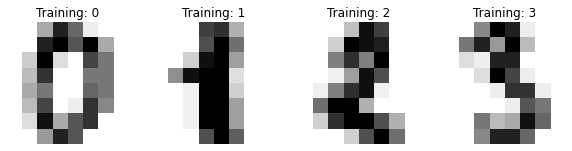

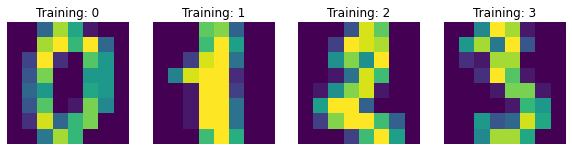

In [2]:
# Nguồn: Mục 4.1, STT:1

# Đọc dữ liệu từ dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('Training: %i' % label)

In [3]:
# Đọc sơ bộ dữ liệu xem có thông tin như thế nào
for i in range(3):
  print("=> Image", i + 1, ": ")
  print("- Matrix:", digits.images[i])
  print("- Size: ", digits.images[i].shape)
  print("- Min: ", np.min(digits.images[i]))
  print("- Max: ", np.max(digits.images[i]))

=> Image 1 : 
- Matrix: [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
- Size:  (8, 8)
- Min:  0.0
- Max:  15.0
=> Image 2 : 
- Matrix: [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
- Size:  (8, 8)
- Min:  0.0
- Max:  16.0
=> Image 3 : 
- Matrix: [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
- S

- Sau khi đọc thử một vài ảnh, nhóm em nhận thấy:
  + Ảnh là các ma trận 8x8
  + Các phần tử trong mỗi ảnh trong khoảng [0, 16]
- Nhóm em tiến hành chuyển chúng về trong khoảng [0, 1] để lúc sau phân loại chính xác hơn

In [4]:
# Chuyển giá trị các điểm ảnh về trong khoảng [0, 1]

# Dùng np.max() để tìm giá trị điểm ảnh lớn nhất trong ảnh để đảm bảo các giá trị trả về trong khoảng [0, 1]
for x in digits.images:
   x /= np.max(x)

# Kiểm tra lại bộ dữ liệu xem đã được chỉnh sửa hay chưa
for i in range(3):
  print("=> Image", i + 1, ": ")
  print("- Matrix:", digits.images[i])

=> Image 1 : 
- Matrix: [[0.         0.         0.33333333 0.86666667 0.6        0.06666667
  0.         0.        ]
 [0.         0.         0.86666667 1.         0.66666667 1.
  0.33333333 0.        ]
 [0.         0.2        1.         0.13333333 0.         0.73333333
  0.53333333 0.        ]
 [0.         0.26666667 0.8        0.         0.         0.53333333
  0.53333333 0.        ]
 [0.         0.33333333 0.53333333 0.         0.         0.6
  0.53333333 0.        ]
 [0.         0.26666667 0.73333333 0.         0.06666667 0.8
  0.46666667 0.        ]
 [0.         0.13333333 0.93333333 0.33333333 0.66666667 0.8
  0.         0.        ]
 [0.         0.         0.4        0.86666667 0.66666667 0.
  0.         0.        ]]
=> Image 2 : 
- Matrix: [[0.     0.     0.     0.75   0.8125 0.3125 0.     0.    ]
 [0.     0.     0.     0.6875 1.     0.5625 0.     0.    ]
 [0.     0.     0.1875 0.9375 1.     0.375  0.     0.    ]
 [0.     0.4375 0.9375 1.     1.     0.125  0.     0.    ]
 [0.    

#### **4.2.2. Chia bộ dữ liệu và training**

- Sau khi tham khảo trên internet (Mục 4.1, STT: 2) thì nhóm em tiến hành:
  + Chia bộ dữ liệu theo tỉ lệ: 80% train, 20% test
  + Chọn tham số gần như tốt cho SVC là: C = 10; gamma = 0.1; kernel = 'rbf'


In [5]:
# Nguồn: Mục 4.1, STT:1

# flatten the images
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(C = 10, gamma = 0.1, kernel = 'rbf')

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

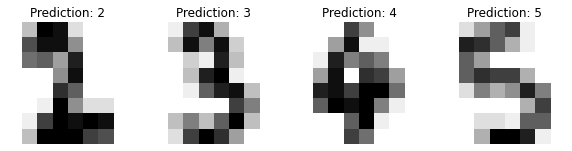

In [6]:
# Nguồn: Mục 4.1, STT:1

# Xuất các ảnh có các giá trị đã predict để tự so sánh

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.86      0.93        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.92      0.92      0.92        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg 

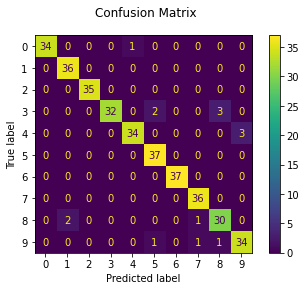

In [7]:
# Nguồn: Mục 4.1, STT:1

# Xuất Confusion matrix

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

- Sau khi training xong, nhận được kết quả khá khả quan **96%** nên nhóm bắt đầu tiến hành thử nghiệm với máy ảnh

#### **4.2.3. Đọc dữ liệu từ máy ảnh**

In [8]:
# Nguồn: Mục 4.1, STT:3

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#### **4.2.4. Các hàm xử lí ảnh, dự đoán và hiển thị**

In [9]:
# Thêm các thư viện cần thiết
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Hàm chuyển ảnh về chữ đen, nền trắng
def getBlackWhiteImage(input, output):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám (GrayScale)
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Làm mịn hình ảnh với cv2.GaussianBlur
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    # Chuyển ảnh về chữ đen, nền trắng theo ngưỡng của phương thức Ostu (Mục 4.1, STT: 5)
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Lưu ảnh chữ trắng, nền đen
    cv2.imwrite(output, ostu_thresh)
    # Trả về tên file ảnh chữ đen, nền trắng
    return output

# Hàm chuyển ảnh từ 'chữ đen, nền trắng' sang 'chữ trắng, nền đen'
def convertWhiteBlackImage(input, output):
    # Đọc ảnh với thư viện PIL
    image = Image.open(input)
    # Dùng ImageOps.invert để chuyển đổi 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' (Mục 4.1, STT: 6)
    image_result = ImageOps.invert(image)
    # Lưu ảnh đã invert
    image_result.save(output)
    # Trả về tên file ảnh 'chữ trắng, nền đen'
    return output

# Hàm cropping ảnh bỏ phần thừa (Nguồn: Mục 4.1, STT: 9)
def cropImage(input, output):
    # Đọc ảnh với thư viện OpenCV
    img = cv2.imread(input)
    # Chuyển ảnh từ BRG về GRAY
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Dùng threshold để làm ảnh thành đen trắng
    ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Dùng findContours để tìm các vùng
    contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    # Tìm contour lớn nhất rồi crop ảnh
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x,y,w,h = cv2.boundingRect(biggest_contour)
    if (w<h):
        x -= int((h-w)/2)
        w = h
    elif (w>h):
        y -= int((w-h)/2)
        h = w
    if x<0 or y<0:
        x,y,w,h = cv2.boundingRect(biggest_contour)
    img_ = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),0)
    crop = img_[y:y+h, x:x+w]
    # Lưu ảnh vào output
    cv2.imwrite(output, crop)
    # Trả về tên file output
    return output

# Hàm thay đổi kích thước ảnh sang 8x8
def resizeImage(input, output):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Resize ảnh (Mục 4.1, STT: 7)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    # Lưu ảnh 8x8
    cv2.imwrite(output, image_8_8)
    # Trả về tên file ảnh 8x8
    return output

# Hàm trả về kết quả predict được từ ảnh 8x8
def getResult(input):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Chuyển các giá trị ảnh 8x8 về trong khoảng [0, 1]
    image = image / np.max(image)
    # Định hình lại ma trận từ (8, 8) sang (1, 64) để mô hình predict được
    image_predict = image.reshape(1, 64)
    #Trả về kết quả đã predict được
    return clf.predict(image_predict)[0]

# Hàm hiển thị 3 ảnh bằng pyplot (Nguồn: Mục 4.1, STT: 8)
def show3Images(img_1, title_1, img_2, title_2, img_3, title_3):
    image_1 = cv2.imread(img_1)
    image_2 = cv2.imread(img_2)
    image_3 = cv2.imread(img_3)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1, cmap=plt.cm.gray_r)
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2, cmap=plt.cm.gray_r)
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3, cmap=plt.cm.gray_r)
    plt.title(title_3)
    plt.show()

# Hàm hiển thị 4 ảnh bằng pyplot (Nguồn: Mục 4.1, STT: 8)
def show4Images(img_1, title_1, img_2, title_2, img_3, title_3, img_4, title_4):
    image_1 = cv2.imread(img_1)
    image_2 = cv2.imread(img_2)
    image_3 = cv2.imread(img_3)
    image_4 = cv2.imread(img_4)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 4, 1)
    plt.imshow(image_1, cmap=plt.cm.gray_r)
    plt.title(title_1)
    plt.subplot(1, 4, 2)
    plt.imshow(image_2, cmap=plt.cm.gray_r)
    plt.title(title_2)
    plt.subplot(1, 4, 3)
    plt.imshow(image_3, cmap=plt.cm.gray_r)
    plt.title(title_3)
    plt.subplot(1, 4, 4)
    plt.imshow(image_4, cmap=plt.cm.gray_r)
    plt.title(title_4)
    plt.show()

#### **4.2.5. Các hàm xử lí chính**

##### **4.2.5.1. Xử lí ảnh chụp**

In [10]:
# Thêm các thư viện cần thiết
import os

# Các tên file ảnh tạm dùng để xử lí
image_crop = "temp_c.jpg"
image_text_black_background_white = "temp_b.jpg"
image_text_white_background_black = "temp_w.jpg"
image_8_8 = "temp_8x8.jpg"

# Hàm Xử lí ảnh -> Resize -> Predict
def getResultProcessResize(image_original):
    # Chuyển ảnh gốc sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_original, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Resize ảnh về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_text_white_background_black, image_8_8)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_8_8)
    # Hiển thị các ảnh: gốc, chữ trắng, 8x8 -> Predict
    show3Images(image_original, "Original",
                image_text_white_background_black, "Text: White; Background: Black",
                image_8_8, "Prediction:" + str(result))
    #Xóa các file ảnh tạm
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
    
# Hàm Resize -> Xử lí ảnh -> Predict
def getResultResizeProcess(image_original):
    # Resize ảnh gốc về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_original, image_8_8)
    # Chuyển ảnh đã resize sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_8_8, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_text_white_background_black)
    # Hiển thị các ảnh: gốc, 8x8, predict
    show3Images(image_original, "Original",
                image_8_8, "8x8",
                image_text_white_background_black, "Prediction:" + str(result))
    #Xóa các file ảnh tạm
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
    
# Hàm Crop -> Xử lí ảnh -> Resize -> Predict
def getResultCropProcessResize(image_original):
    # Crop ảnh gốc loại bỏ phần thừa và lưu ảnh đã xử lí vào file image_crop
    cropImage(image_original, image_crop)
    # Chuyển ảnh đã crop sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_crop, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Resize ảnh về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_text_white_background_black, image_8_8)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_8_8)
    # Hiển thị các ảnh: gốc, crop, chữ trắng, 8x8 -> predict
    show4Images(image_original, "Original",
                image_crop, "Dropped",
                image_text_white_background_black, "Text: White; Background: Black", 
                image_8_8, "Prediction:" + str(result))
    #Xóa các file ảnh tạm
    os.remove(image_crop)
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
    
# Hàm Crop -> Resize-> Xử lí ảnh -> Predict
def getResultCropResizeProcess(image_original):
    # Crop ảnh gốc loại bỏ phần thừa và lưu ảnh đã xử lí vào file image_crop
    cropImage(image_original, image_crop)
    # Resize ảnh đã crop về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_crop, image_8_8)
    # Chuyển ảnh đã resize sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_8_8, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_text_white_background_black)
    # Hiển thị các ảnh: gốc, crop, 8x8, predict
    show4Images(image_original, "Original",
                image_crop, "Cropped",
                image_8_8, "8x8",
                image_text_white_background_black, "Prediction:" + str(result))
    #Xóa các file ảnh tạm
    os.remove(image_crop)
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)


##### **4.2.5.2. Xử lí ảnh thử nghiệm**

In [11]:
# Thêm các thư viện cần thiết
import os

# Các tên file ảnh tạm dùng để xử lí
image_crop = "temp_c.jpg"
image_text_black_background_white = "temp_b.jpg"
image_text_white_background_black = "temp_w.jpg"
image_8_8 = "temp_8x8.jpg"

# Hàm trả về kết quả của ảnh trong thư mục chứa ảnh thử nghiệm (CASE 1)
# Process -> Resize -> Predict
def getResultImageInTestFolder(image_original, desired):
    # Gán biến kiểm tra bằng False để sau khi xử lí nếu đúng sẽ thay đổi giá trị của biến này
    check = False
    # Chuyển ảnh gốc sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_original, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Resize ảnh về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_text_white_background_black, image_8_8)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_8_8)
    # Hiến thị ảnh: gốc, chữ trắng, 8x8 và kết quả
    show3Images(image_original, "Original",
                image_text_black_background_white, "Text: White; Background: Black",
                image_8_8, "Prediction:" + str(result))
    # Kiểm tra xem kết quả dự đoán có chính xác hay không
    if str(result) == str(desired):
        check = True
    #Xóa các file ảnh tạm
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
    # Trả về giá trị dự đoán và kiểm tra
    return result, check

# Hàm trả về kết quả của ảnh trong thư mục chứa ảnh thử nghiệm (CASE 3)
# Crop -> Process -> Resize -> Predict
def getResultCropImageInTestFolder(image_original, desired):
    # Gán biến kiểm tra bằng False để sau khi xử lí nếu đúng sẽ thay đổi giá trị của biến này
    check = False
    # Crop ảnh gốc loại bỏ phần thừa và lưu ảnh đã xử lí vào file image_crop
    cropImage(image_original, image_crop)
    # Chuyển ảnh đã crop sang 'chữ đen, nền trắng' và lưu ảnh đã xử lí vào file image_text_white_background_black
    getBlackWhiteImage(image_crop, image_text_black_background_white)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' và lưu ảnh đã xử lí vào file image_text_black_background_white
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    # Resize ảnh về (8, 8) và lưu ảnh đã xử lí vào file image_8_8
    resizeImage(image_text_white_background_black, image_8_8)
    # Lưu kết quả dự đoán ảnh 8_8 vào biến result
    result = getResult(image_8_8)
    # Hiến thị ảnh: gốc, chữ trắng, 8x8 và kết quả
    show3Images(image_original, "Original",
                image_text_black_background_white, "Text: White; Background: Black",
                image_8_8, "Prediction:" + str(result))
    # Kiểm tra xem kết quả dự đoán có chính xác hay không
    if str(result) == str(desired):
        check = True
    #Xóa các file ảnh tạm
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
    # Trả về giá trị dự đoán và kiểm tra
    return result, check

#### **4.2.6. Nhận dạng từ máy ảnh**
- Sau buổi học hôm thứ 2 (19/04/2021), nhóm quyết định sẽ chia ra làm 4 trường hợp:
  + TH1: Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán
  + TH2: Thay đổi kích thước thành 8x8 -> Xử lí ảnh -> Dự đoán
  + TH3: Cắt bỏ phần thừa -> Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán
  + TH4: Cắt bỏ phần thừa -> Thay đổi kích thước thành 8x8 -> Xử lí ảnh -> Dự đoán

<IPython.core.display.Javascript object>

CASE 1: Process -> Resize -> Predict


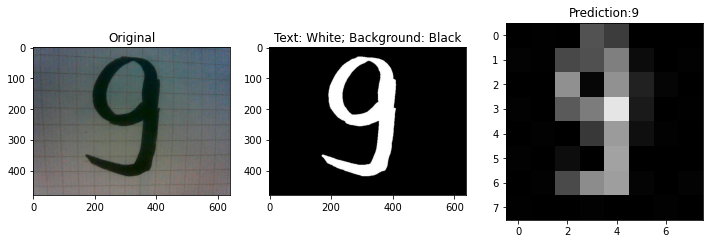

CASE 2: Resize -> Process -> Predict


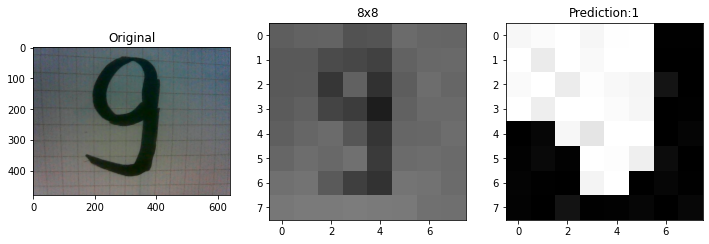

CASE 3: Crop -> Process -> Resize -> Predict


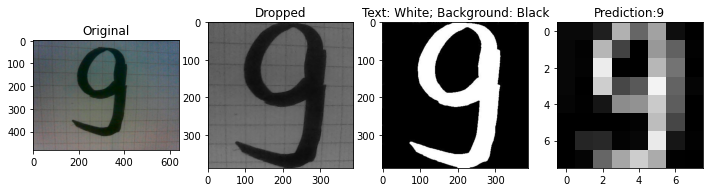

CASE 4: Crop -> Resize -> Process -> Predict


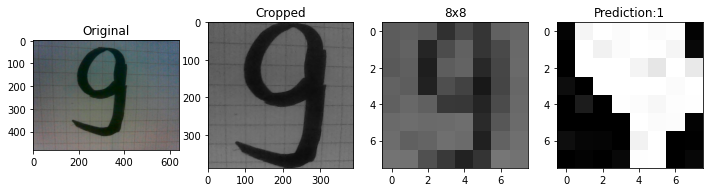

In [16]:
# Thêm các thư viện cần thiết
import os

try:
  # Chụp ảnh và trả về tên ảnh đã lưu vào biến image_original
  image_original = take_photo('temp_o.jpg')
  # Gọi hàm xử lí chính
  # process -> resize -> predict
  print("CASE 1: Process -> Resize -> Predict")
  getResultProcessResize(image_original)
  # resize -> process -> predict
  print("CASE 2: Resize -> Process -> Predict")
  getResultResizeProcess(image_original)
  # crop -> process -> resize -> predict
  print("CASE 3: Crop -> Process -> Resize -> Predict")
  getResultCropProcessResize(image_original)
  # crop -> resize -> process -> predict
  print("CASE 4: Crop -> Resize -> Process -> Predict")
  getResultCropResizeProcess(image_original)

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#### **4.2.7. Thử nghiệm độ chính xác thực tế với những ảnh đã có sẵn**
- Link dữ liệu ảnh có sẵn:
  + Google Drive (UIT authorization): [Hand-written_digits](https://drive.google.com/drive/folders/1YDmn3VTE8HOQPfe5_iqeERmwkaSvBNCN?usp=sharing)
  + GitHub: [Hand-written_digits](https://github.com/caohungphu/CS114.L21/tree/main/Colab/Images/Hand-written_digits)
- Sau khi được kết quả ở Mục 4.2.6, nhóm thấy được:
  + Trường hợp tốt là TH1 và TH3
  + Nhóm quyết định thử nghiệm thực tế với những ảnh đã có sẵn ở TH1 và TH3

In [13]:
# Thêm các thư viện cần thiết
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn thư mục chứa ảnh
dir_test_folder = "/content/CS114.L21/Colab/Images/Hand-written_digits/"

# Nếu không có đường dẫn thì clone từ GitHub về
if not os.path.exists(dir_test_folder):
    !git clone https://github.com/caohungphu/CS114.L21.git

# Dùng os.listdir để lấy tất cả tên file trong thư mục
file_images = os.listdir(dir_test_folder)

# Sắp xếp lại mảng tên file
file_images.sort()

# Xuất ra thông tin thư mục
print("Number of photos:", len(file_images))
print("Path:", dir_test_folder)

Cloning into 'CS114.L21'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 421 (delta 57), reused 58 (delta 15), pack-reused 247
Receiving objects: 100% (421/421), 8.46 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Number of photos: 29
Path: /content/CS114.L21/Colab/Images/Hand-written_digits/


##### **4.2.7.1. Trường hợp 1**
Các bước: Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán

Test: 0 - Images: [0][photo_0].jpg


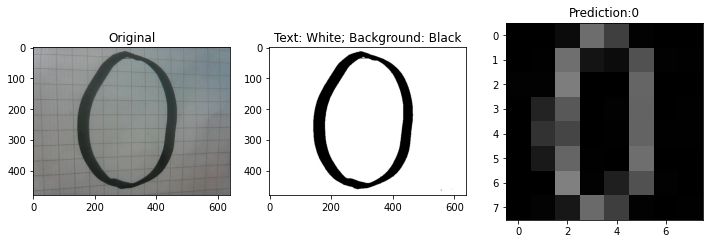

Desired result: 0 - Prediction: 0 => Check: TRUE

Test: 1 - Images: [0][photo_1].jpg


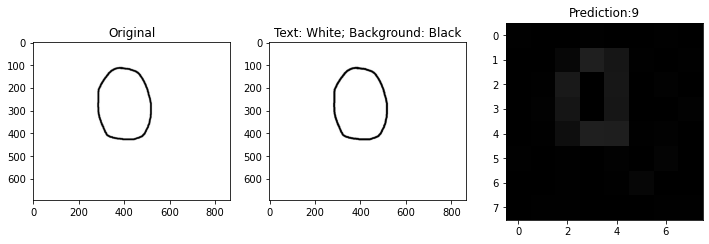

Desired result: 0 - Prediction: 9 => Check: FALSE

Test: 2 - Images: [0][photo_2].jpg


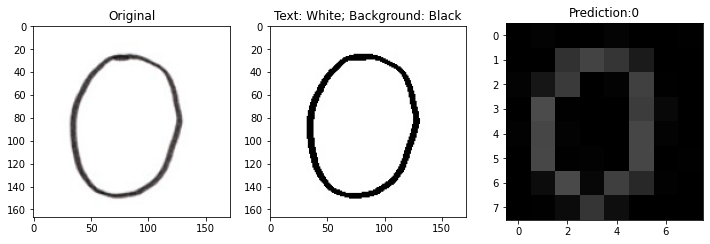

Desired result: 0 - Prediction: 0 => Check: TRUE

Test: 3 - Images: [1][photo_0].jpg


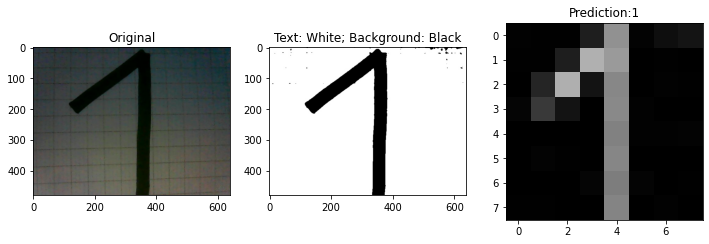

Desired result: 1 - Prediction: 1 => Check: TRUE

Test: 4 - Images: [1][photo_1].jpg


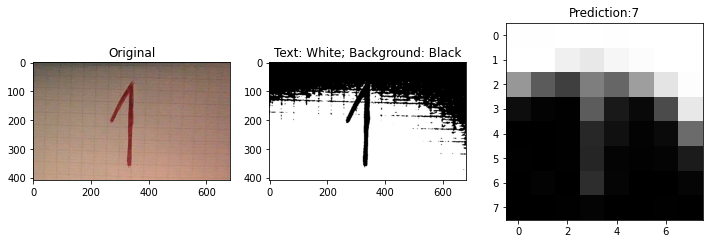

Desired result: 1 - Prediction: 7 => Check: FALSE

Test: 5 - Images: [1][photo_2].jpg


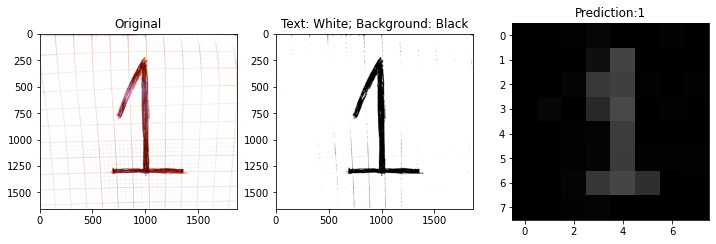

Desired result: 1 - Prediction: 1 => Check: TRUE

Test: 6 - Images: [1][photo_3].jpg


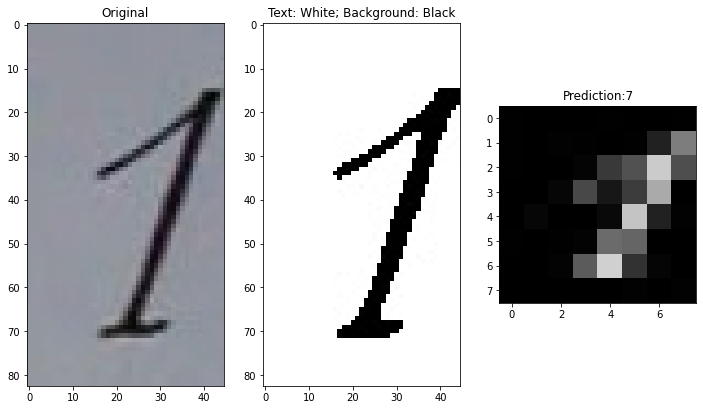

Desired result: 1 - Prediction: 7 => Check: FALSE

Test: 7 - Images: [2][photo_0].jpg


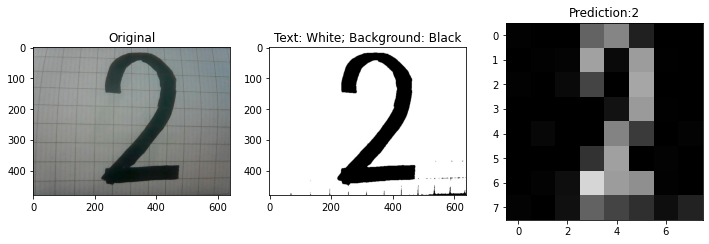

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 8 - Images: [2][photo_1].jpg


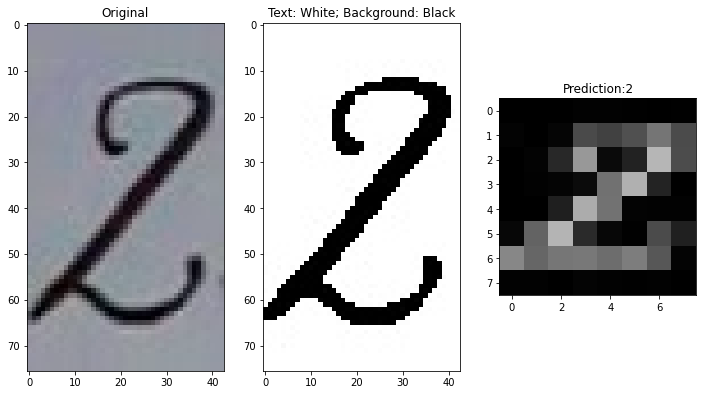

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 9 - Images: [2][photo_2].jpg


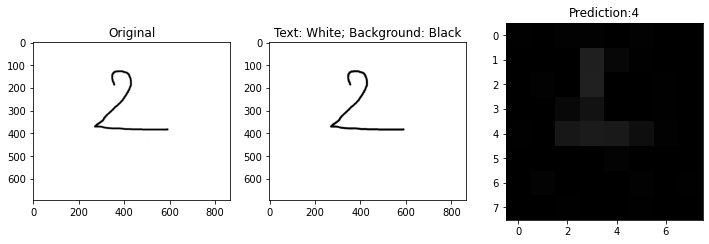

Desired result: 2 - Prediction: 4 => Check: FALSE

Test: 10 - Images: [2][photo_3].jpg


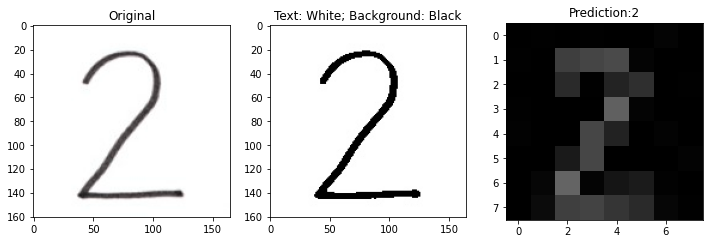

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 11 - Images: [3][photo_0].jpg


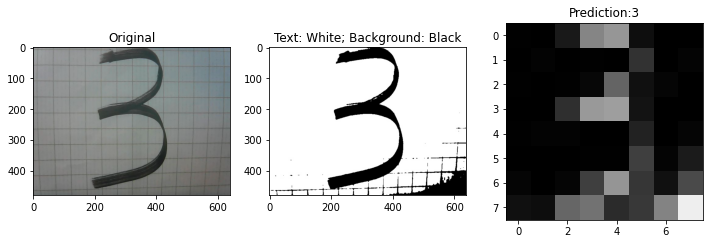

Desired result: 3 - Prediction: 3 => Check: TRUE

Test: 12 - Images: [4][photo_0].jpg


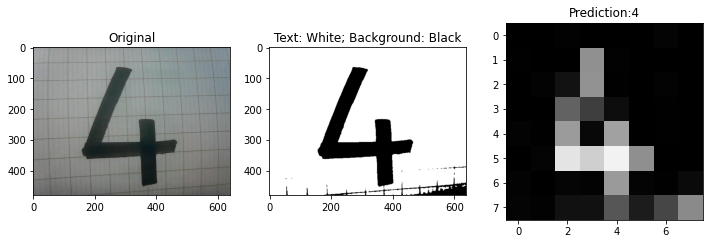

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 13 - Images: [4][photo_1].jpg


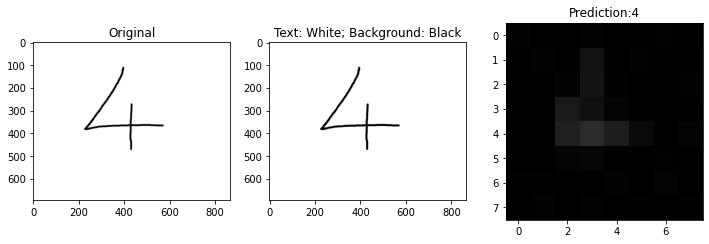

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 14 - Images: [4][photo_2].jpg


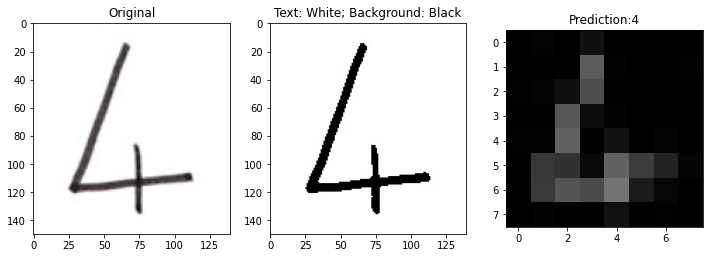

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 15 - Images: [5][photo_0].jpg


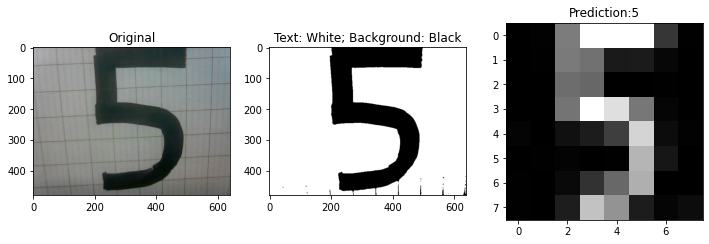

Desired result: 5 - Prediction: 5 => Check: TRUE

Test: 16 - Images: [5][photo_1].jpg


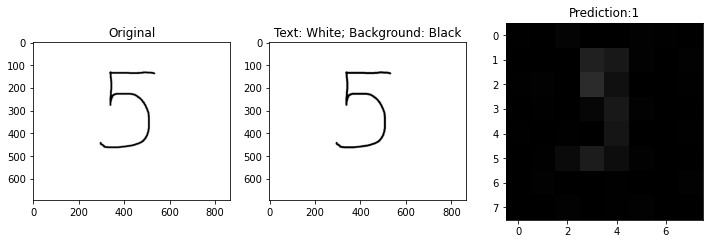

Desired result: 5 - Prediction: 1 => Check: FALSE

Test: 17 - Images: [6][photo_0].jpg


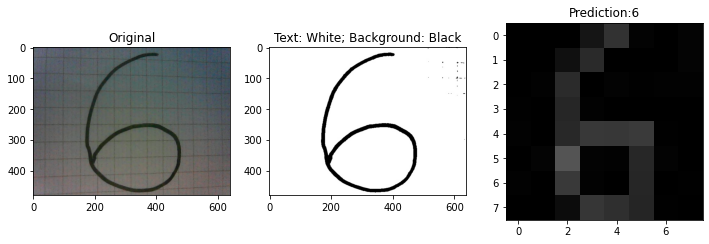

Desired result: 6 - Prediction: 6 => Check: TRUE

Test: 18 - Images: [6][photo_1].jpg


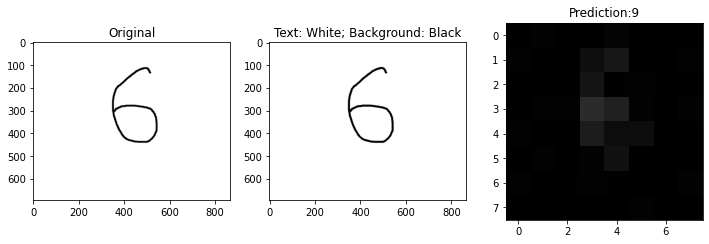

Desired result: 6 - Prediction: 9 => Check: FALSE

Test: 19 - Images: [7][photo_0].jpg


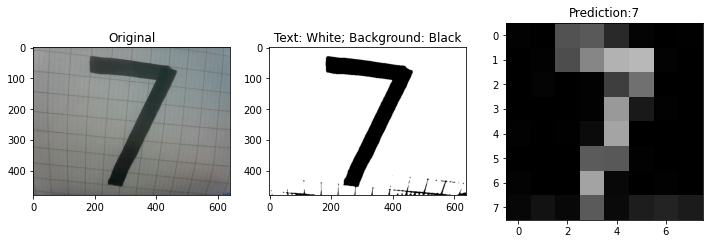

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 20 - Images: [7][photo_1].jpg


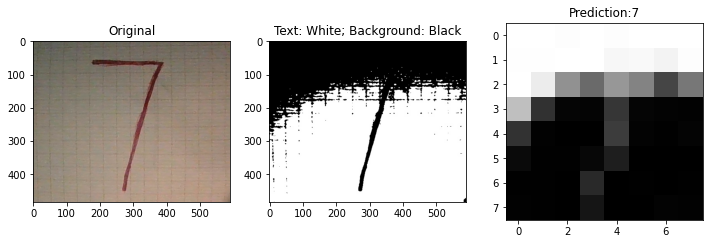

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 21 - Images: [7][photo_2].jpg


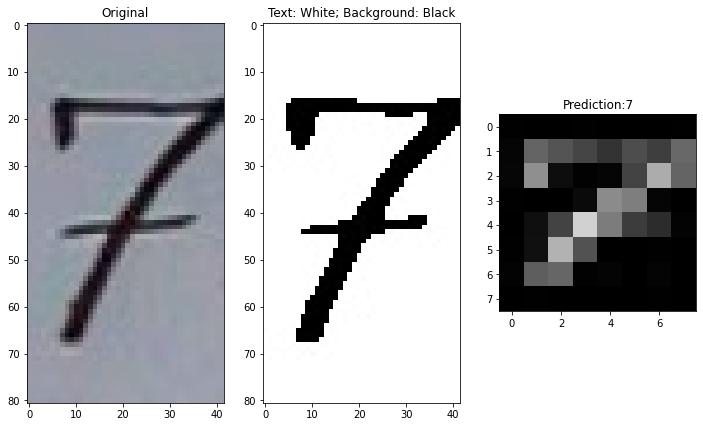

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 22 - Images: [7][photo_3].jpg


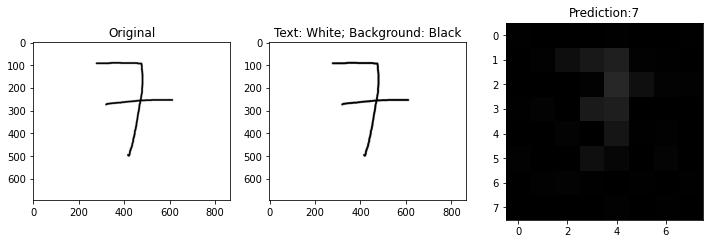

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 23 - Images: [8][photo_0].jpg


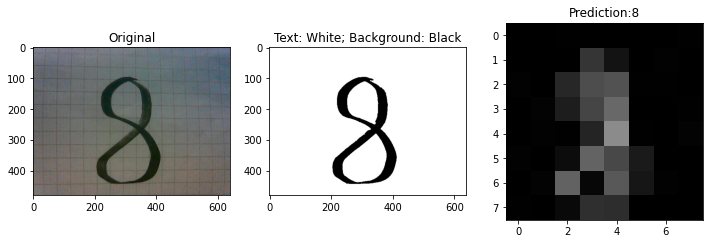

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 24 - Images: [8][photo_1].jpg


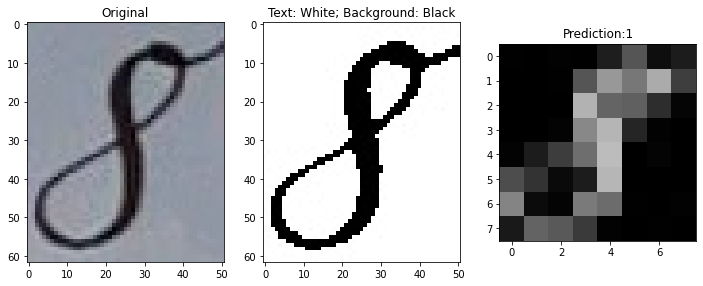

Desired result: 8 - Prediction: 1 => Check: FALSE

Test: 25 - Images: [8][photo_2].jpg


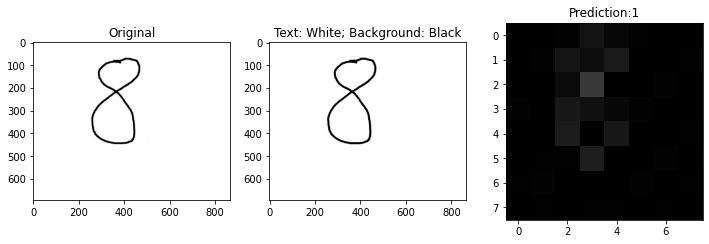

Desired result: 8 - Prediction: 1 => Check: FALSE

Test: 26 - Images: [8][photo_3].jpg


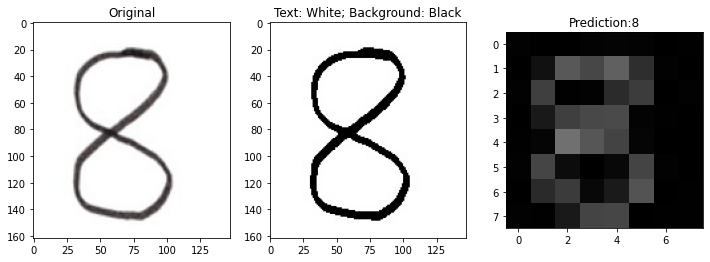

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 27 - Images: [9][photo_0].jpg


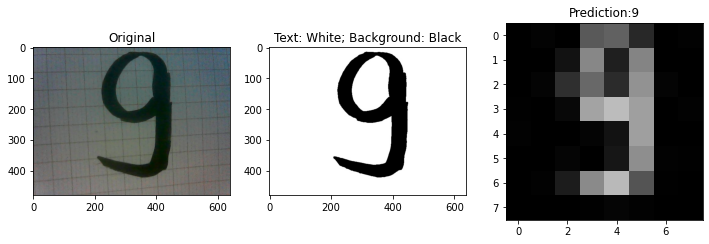

Desired result: 9 - Prediction: 9 => Check: TRUE

Test: 28 - Images: [9][photo_1].jpg


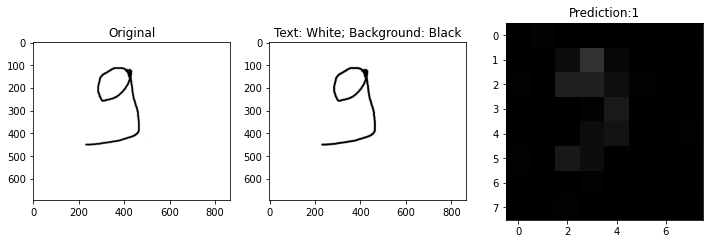

Desired result: 9 - Prediction: 1 => Check: FALSE

Total tests: 29
True tests: 20
False tests 9
Accuracy: 68.97


In [14]:
# Tạo biến để tính toán độ chính xác dự đoán của mô hình
total_test = len(file_images)
true_test = 0

# Lặp tất cả các file trong thư mục
for i, file_image in enumerate(file_images):
    # Hiển thị thông tin test: số thứ tự và tên ảnh
    print("Test:",i,"- Images:",file_image)

    # Lấy đường dẫn đầy đủ của ảnh
    dir_file_image = dir_test_folder + file_image

    # Gọi hàm xử lí chính ảnh trong thư mục thử nghiệm CASE 1
    result, check = getResultImageInTestFolder(dir_file_image, file_image[1])

    # Nếu thấy mô hình dự đoán đúng thì tăng biến true_test lên 1 đơn vị
    if check: true_test += 1

    # In ra thông tin kết quả của ảnh mà mô hình dự đoán được: KQ mong muốn, KQ dự đoán, Dự đoán đúng hay không
    print("Desired result:", file_image[1],"- Prediction:", result,"=> Check:", str(check).upper())
    print("===========================================================================================\n")

# In ra thông tin tổng quát: Tổng số test, số test đúng, số test sai, độ chính xác
print("Total tests:", total_test)
print("True tests:", true_test)
print("False tests", total_test - true_test)
accuracy = round((true_test / total_test) * 100, 2)
print("Accuracy: {:.2f}".format(accuracy))
print("===========================================================================================")

##### **4.2.7.2. Trường hợp 3**
Các bước: Cắt bỏ phần thừa -> Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán

Test: 0 - Images: [0][photo_0].jpg


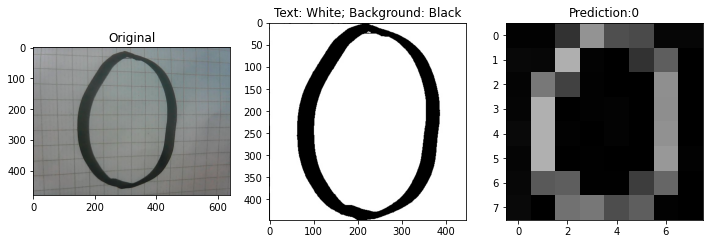

Desired result: 0 - Prediction: 0 => Check: TRUE

Test: 1 - Images: [0][photo_1].jpg


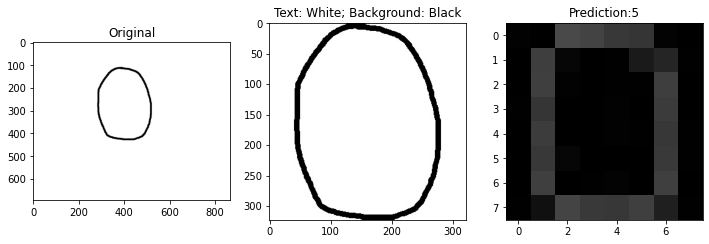

Desired result: 0 - Prediction: 5 => Check: FALSE

Test: 2 - Images: [0][photo_2].jpg


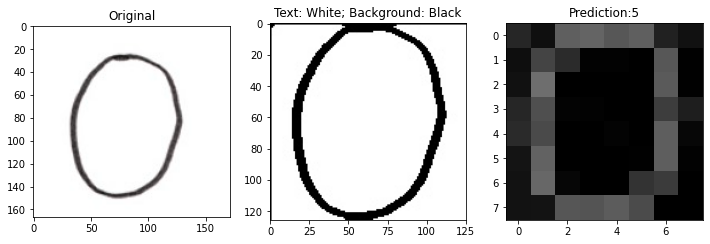

Desired result: 0 - Prediction: 5 => Check: FALSE

Test: 3 - Images: [1][photo_0].jpg


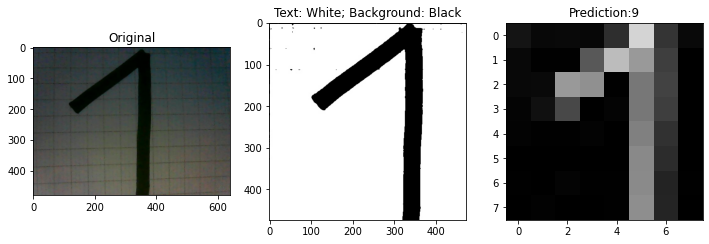

Desired result: 1 - Prediction: 9 => Check: FALSE

Test: 4 - Images: [1][photo_1].jpg


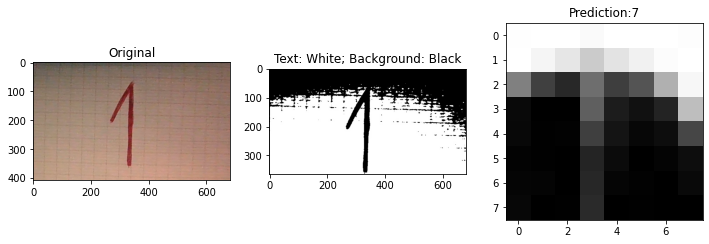

Desired result: 1 - Prediction: 7 => Check: FALSE

Test: 5 - Images: [1][photo_2].jpg


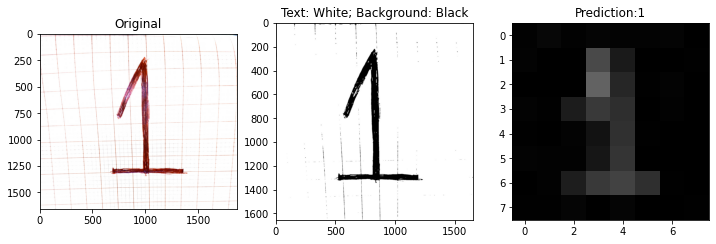

Desired result: 1 - Prediction: 1 => Check: TRUE

Test: 6 - Images: [1][photo_3].jpg


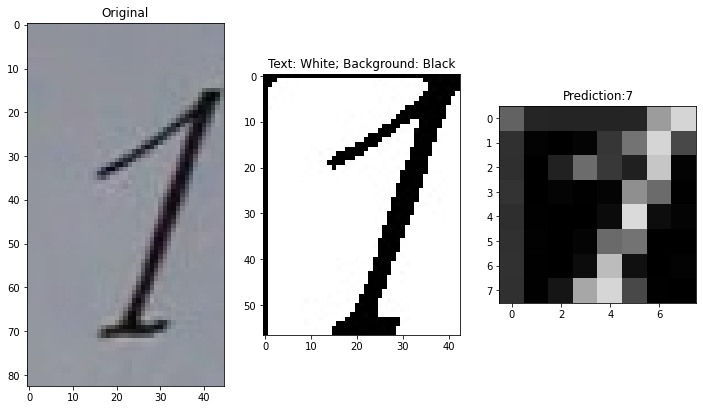

Desired result: 1 - Prediction: 7 => Check: FALSE

Test: 7 - Images: [2][photo_0].jpg


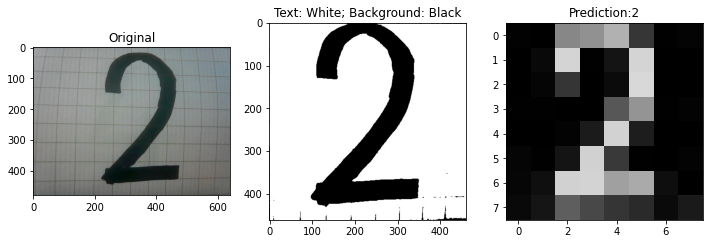

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 8 - Images: [2][photo_1].jpg


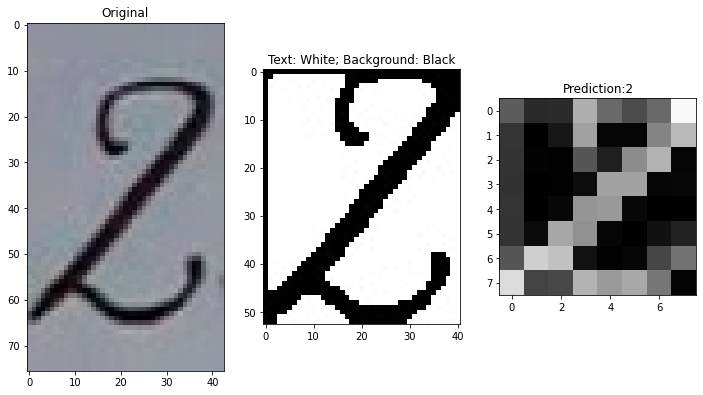

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 9 - Images: [2][photo_2].jpg


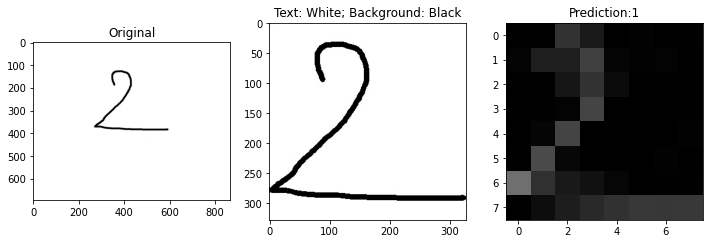

Desired result: 2 - Prediction: 1 => Check: FALSE

Test: 10 - Images: [2][photo_3].jpg


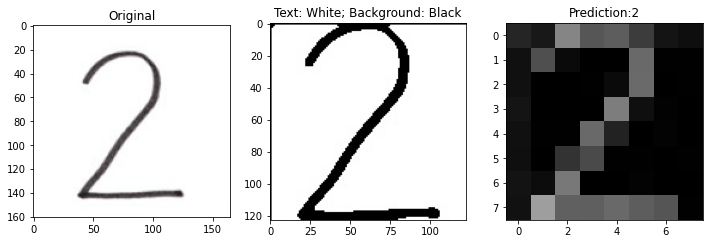

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 11 - Images: [3][photo_0].jpg


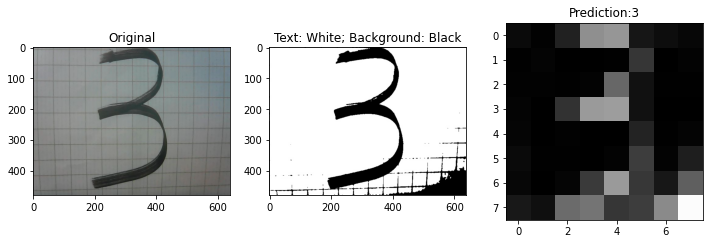

Desired result: 3 - Prediction: 3 => Check: TRUE

Test: 12 - Images: [4][photo_0].jpg


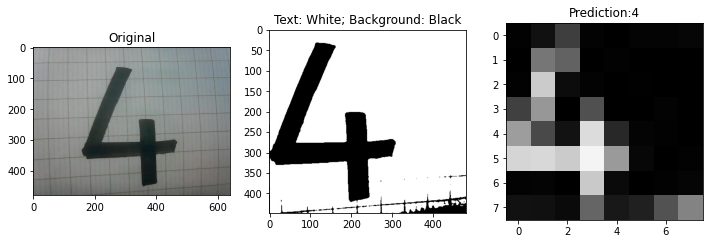

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 13 - Images: [4][photo_1].jpg


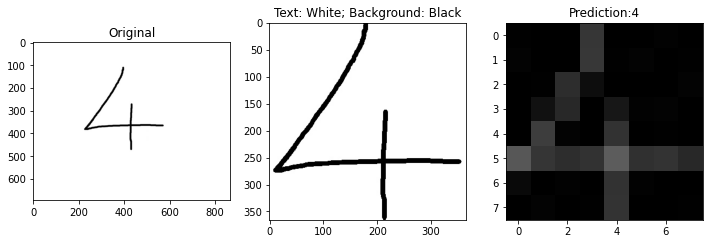

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 14 - Images: [4][photo_2].jpg


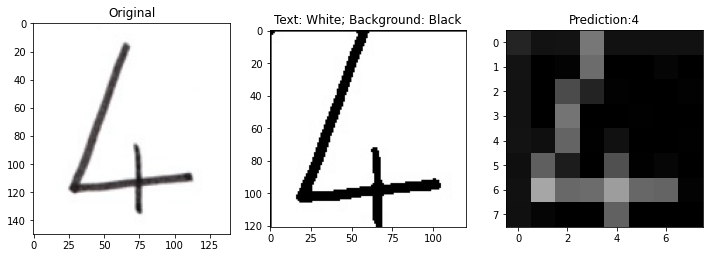

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 15 - Images: [5][photo_0].jpg


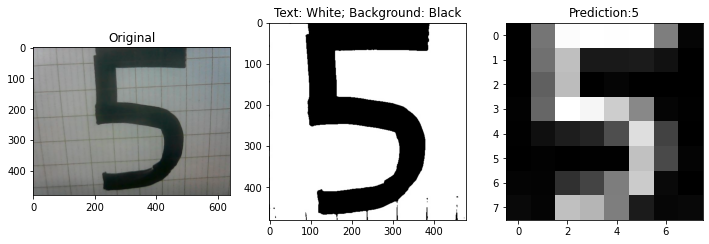

Desired result: 5 - Prediction: 5 => Check: TRUE

Test: 16 - Images: [5][photo_1].jpg


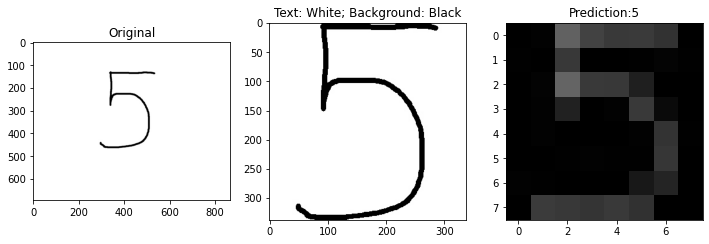

Desired result: 5 - Prediction: 5 => Check: TRUE

Test: 17 - Images: [6][photo_0].jpg


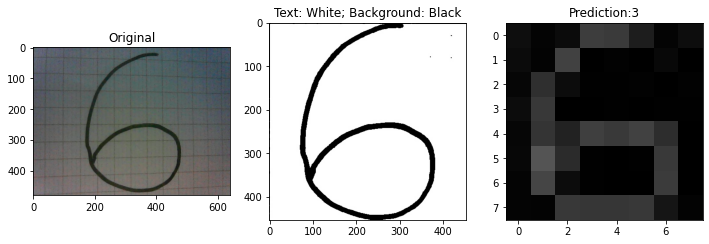

Desired result: 6 - Prediction: 3 => Check: FALSE

Test: 18 - Images: [6][photo_1].jpg


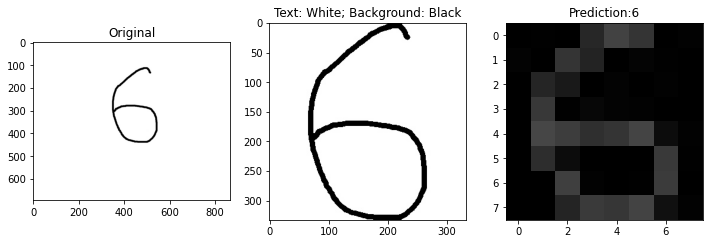

Desired result: 6 - Prediction: 6 => Check: TRUE

Test: 19 - Images: [7][photo_0].jpg


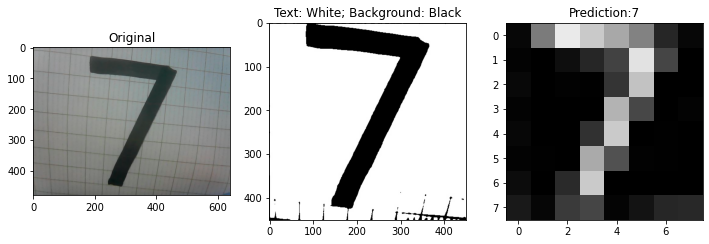

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 20 - Images: [7][photo_1].jpg


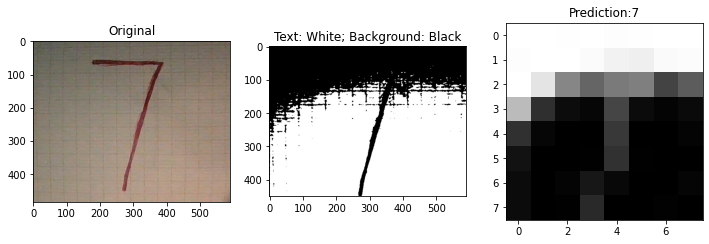

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 21 - Images: [7][photo_2].jpg


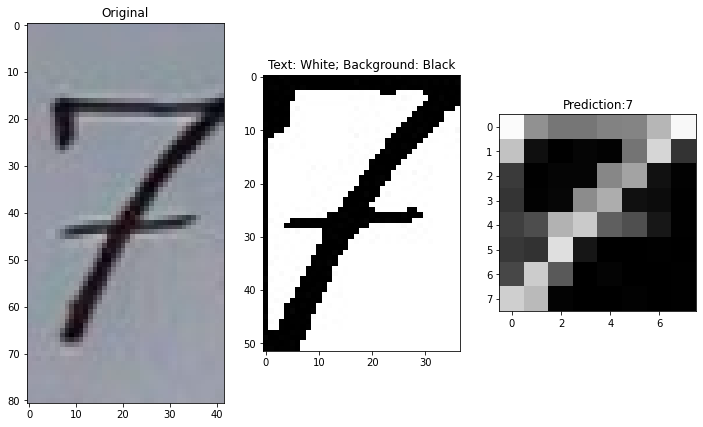

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 22 - Images: [7][photo_3].jpg


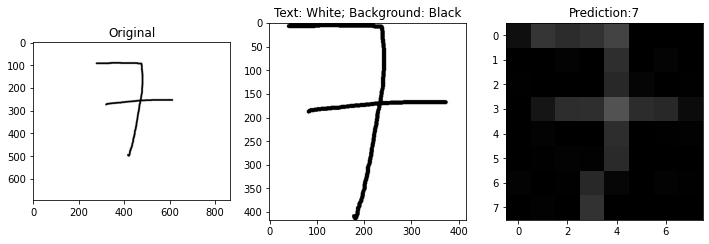

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 23 - Images: [8][photo_0].jpg


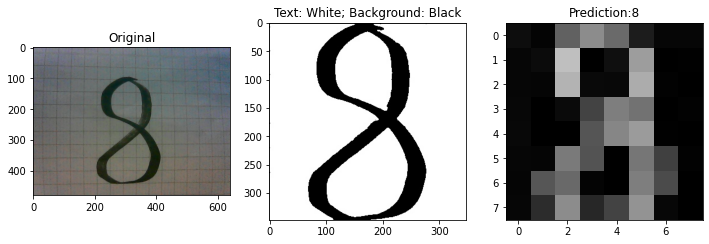

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 24 - Images: [8][photo_1].jpg


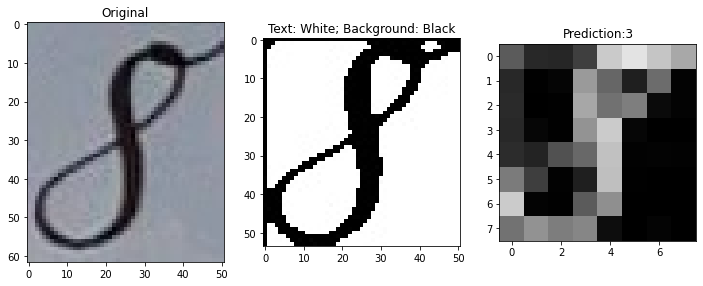

Desired result: 8 - Prediction: 3 => Check: FALSE

Test: 25 - Images: [8][photo_2].jpg


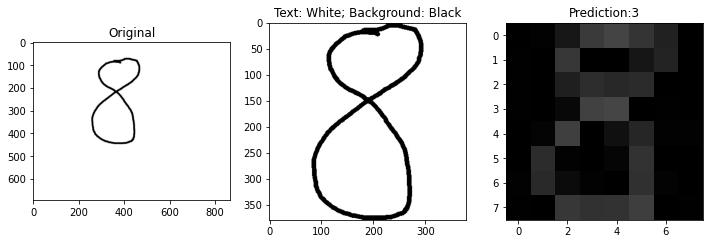

Desired result: 8 - Prediction: 3 => Check: FALSE

Test: 26 - Images: [8][photo_3].jpg


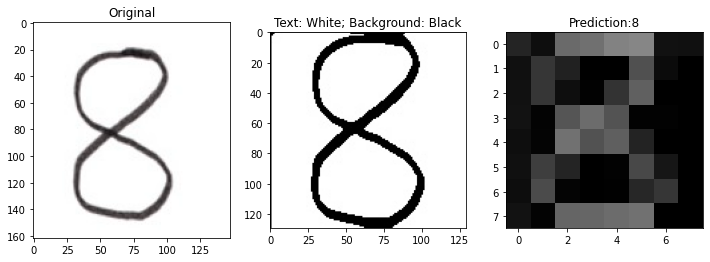

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 27 - Images: [9][photo_0].jpg


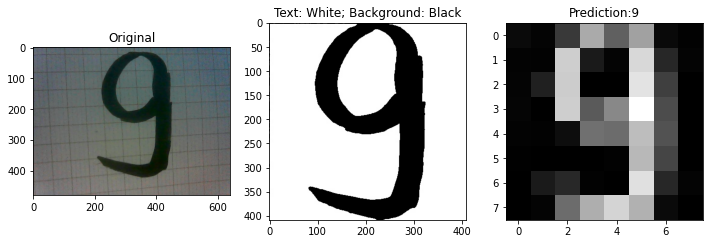

Desired result: 9 - Prediction: 9 => Check: TRUE

Test: 28 - Images: [9][photo_1].jpg


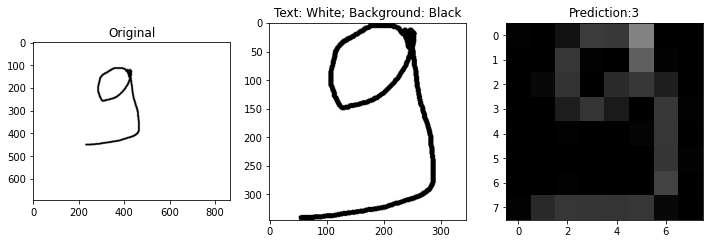

Desired result: 9 - Prediction: 3 => Check: FALSE

Total tests: 29
True tests: 19
False tests 10
Accuracy: 65.52


In [15]:
# Tạo biến để tính toán độ chính xác dự đoán của mô hình
total_test = len(file_images)
true_test = 0

# Lặp tất cả các file trong thư mục
for i, file_image in enumerate(file_images):
    # Hiển thị thông tin test: số thứ tự và tên ảnh
    print("Test:",i,"- Images:",file_image)

    # Lấy đường dẫn đầy đủ của ảnh
    dir_file_image = dir_test_folder + file_image

    # Gọi hàm xử lí chính ảnh trong thư mục thử nghiệm CASE 3
    result, check = getResultCropImageInTestFolder(dir_file_image, file_image[1])

    # Nếu thấy mô hình dự đoán đúng thì tăng biến true_test lên 1 đơn vị
    if check: true_test += 1

    # In ra thông tin kết quả của ảnh mà mô hình dự đoán được: KQ mong muốn, KQ dự đoán, Dự đoán đúng hay không
    print("Desired result:", file_image[1],"- Prediction:", result,"=> Check:", str(check).upper())
    print("===========================================================================================\n")

# In ra thông tin tổng quát: Tổng số test, số test đúng, số test sai, độ chính xác
print("Total tests:", total_test)
print("True tests:", true_test)
print("False tests", total_test - true_test)
accuracy = round((true_test / total_test) * 100, 2)
print("Accuracy: {:.2f}".format(accuracy))
print("===========================================================================================")

## **5. NHẬN XÉT VÀ TRẢ LỜI YÊU CẦU ĐỀ BÀI**

### **5.1. Nhận xét**
- Sau khi đã thử với webcam máy tính (Số to, rõ, nền không bị nhiễu) thì kết quả cho ra là ***không tốt*** ([Mục 4.2.6](https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb#scrollTo=7MEC3b7gCAHu)) đối với cả 4 trường hợp các bước thực hiện:
  + **TH1**: Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán
  + **TH2**: Thay đổi kích thước thành 8x8 -> Xử lí ảnh -> Dự đoán
  + **TH3**: Cắt bỏ phần thừa -> Xử lí ảnh -> Thay đổi kích thước thành 8x8 -> Dự đoán
  + **TH4**: Cắt bỏ phần thừa -> Thay đổi kích thước thành 8x8 -> Xử lí ảnh -> Dự đoán
- Dựa trên kết quả trên, nhóm nhận thấy TH1 và TH3 cho kết quả tốt hơn so với các trường hợp nên nhóm tiến hành chụp sẵn bộ dữ liệu để thử nghiệm lại model so với thực tế (Số nhỏ hơn, nét thanh, nền bị nhiễu, chữ số nghiêng,...) với TH1 và TH3: ([Mục 4.2.7](https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb#scrollTo=OvKl3tKwl8Cm))
- Bộ dữ liệu gồm: 29 ảnh
- Phân loại đúng:
  + **TH1**: 20/29 ảnh ![\approx](https://latex.codecogs.com/svg.latex?\approx) **68.97%**
  + **TH3**: 19/29 ảnh ![\approx](https://latex.codecogs.com/svg.latex?\approx)  **65,52%**
- Thực tế cho ta thấy được trong số các trường hợp phân loại đúng vẫn còn trường hợp là may mắn do model (Vd: Test 20)
- Vậy kết quả thực tế cho ra ***không tốt***

### **5.2. Trả lời yêu cầu đề bài**
- Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  + Kết quả chạy thực tế với webcam của laptop và giấy viết tay: ***Không tốt***
- Nhìn vào đâu để kết luận là tốt hay không?
  + Nhìn vào tỉ lệ ảnh được phân loại đúng, kết quả không đáp ứng đủ yêu cầu nhóm đặt ra (Số nhỏ hơn, nét thanh, nền bị nhiễu, chữ số nghiêng,...) ([Mục 4.2.7](https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb#scrollTo=OvKl3tKwl8Cm))
- Nếu không tốt thì lý do tại sao? (Các test ở [Mục 4.2.7](https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb#scrollTo=OvKl3tKwl8Cm))
  + Chữ số viết tay không đủ rõ (Nét chữ mỏng, chữ quá nhỏ) nên khi resize không đủ pixel để nhận ra các nét cong:
    + Test 1: [[0][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B0%5D%5Bphoto_1%5D.jpg)
    + Test 2: [[0][photo_2].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B0%5D%5Bphoto_2%5D.jpg)
    + Test 9: [[2][photo_2].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B2%5D%5Bphoto_2%5D.jpg)
    + Test 17: [[6][photo_0].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B6%5D%5Bphoto_0%5D.jpg)
    + Test 25: [[8][photo_2].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B8%5D%5Bphoto_2%5D.jpg)
    + Test 28: [[9][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B9%5D%5Bphoto_1%5D.jpg)
  + Số viết nghiêng nên phân loại sai:
    + Test 6: [[1][photo_3].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B1%5D%5Bphoto_3%5D.jpg)
    + Test 24: [[8][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B8%5D%5Bphoto_1%5D.jpg)
    + Test 28: [[9][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B9%5D%5Bphoto_1%5D.jpg)
  + Ảnh chụp sáng tối không đều lúc chuyển đổi về 8x8 có nhiều pixel gây nhiễu.
    + Test 4: [[1][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B1%5D%5Bphoto_1%5D.jpg)
    + Test 20: [[7][photo_1].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B7%5D%5Bphoto_1%5D.jpg)
  + Ảnh không thể crop về dạng hình vuông (Nếu crop chắc chắn sẽ mất 1 phần của số) nên lúc resize hình dạng của số sẽ bị biến đổi.
    + Test 9: [[2][photo_2].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B2%5D%5Bphoto_2%5D.jpg)
    + Test 21: [[7][photo_2].jpg](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Images/Hand-written_digits/%5B7%5D%5Bphoto_2%5D.jpg)
  + Ảnh sau khi resize về 8x8 thì vẫn chưa tốt ở vài điểm nên model phân loại chưa chính xác nhất